<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - KNN Item Item RMSE</h1> 
<h2 align="center">Alejo Paullier</h2> 

https://lkpy.lenskit.org/en/stable/knn.html

# Import libraries and define evaluation function

In [1]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, item_knn as knn
from lenskit.metrics.predict import rmse
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib import style

ratings = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Demo\\ml-100k\\u.data', sep='\t',
                      names=['user', 'item', 'rating', 'timestamp'])


def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # train the algorithm with the training dataset
    # Now we run the recommender:
    preds = batch.predict(fittable, test)
    # add the algorithm name for analyzability
    return preds

# Run manual optimization

In [3]:
def model_trainer(neighbours):
    neighbours=int(neighbours)
    all_recs = []
    test_data = []
    algo_ii = knn.ItemItem(neighbours,aggregate='weighted-average') # define algorithm
    
    for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
        test_data.append(test) # save testing data
        all_recs.append(eval('ItemItem', algo_ii, train, test))
    
    all_recs = pd.concat(all_recs, ignore_index=True)

    results = rmse(all_recs['prediction'], all_recs['rating'])
    return results

In [ ]:
neighbours = []
metric = [[] for _ in range(5)]

for i in range(1,21):
    neighbours.append(i*5)

for j in range(len(metric)):
    for i in neighbours:
        metric[j].append(model_trainer(i))

# Load previously ran output

In [3]:
metric = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\KNN Item Item\\Manual optimization results\\rmse_metric.csv', sep=',')
neighbours = pd.DataFrame(neighbours)
metric =  pd.concat([neighbours,metric],axis=1)
names = ["neighbours","1","2","3","4","5"]
metric.columns = names
metric

,neighbours,1,2,3,4,5
0,5,0.938980,0.935168,0.942391,0.945775,0.936612
1,10,0.910646,0.911401,0.916187,0.911166,0.907624
2,15,0.898574,0.895412,0.905611,0.897506,0.910798
3,20,0.908620,0.901877,0.899022,0.908870,0.900775
4,25,0.903061,0.904024,0.894890,0.901587,0.903156
5,30,0.902128,0.902130,0.892157,0.897919,0.903391
6,35,0.904768,0.906739,0.906381,0.903461,0.903118
7,40,0.902958,0.907521,0.904517,0.904366,0.905440
8,45,0.914129,0.903824,0.902963,0.908838,0.908152
9,50,0.901709,0.903312,0.905227,0.902050,0.908140


# Optimal number of neighbours

In [12]:
print("Lowest RMSE:",min(metric[["1","2","3","4","5"]].mean(axis=1)))
idx = metric[["1","2","3","4","5"]].mean(axis=1).idxmin()
print("Optimal number of neighbours:", metric.iloc[idx]['neighbours'])
average = metric[["1","2","3","4","5"]].mean(axis=1)
average = pd.DataFrame(average)
average = pd.concat([neighbours,average],axis=1)
average.columns = ['Neighbours','Average RMSE']
average

Lowest RMSE: 0.8995448382331954
Optimal number of neighbours: 30.0


,Neighbours,Average RMSE
0,5,0.939785
1,10,0.911405
2,15,0.901580
3,20,0.903833
4,25,0.901344
5,30,0.899545
6,35,0.904893
7,40,0.904960
8,45,0.907581
9,50,0.904088


# Average Plot

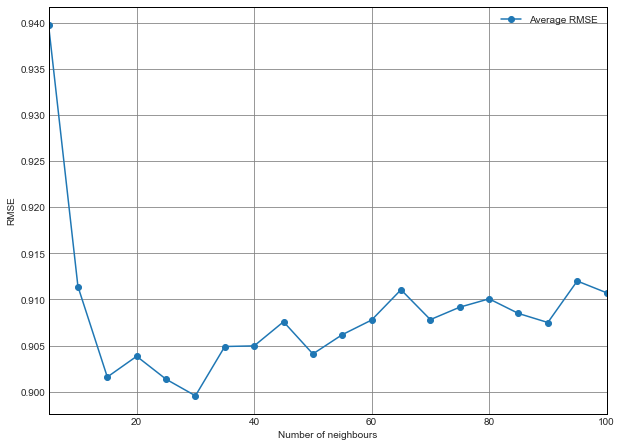

In [13]:
average.plot(x='Neighbours',y='Average RMSE',grid=True, figsize=(10,7.5),marker='o')
style.use('seaborn-whitegrid')
plt.grid(color='gray')
plt.rc_context({'axes.edgecolor':'black'})
pl.xlabel("Number of neighbours")
pl.ylabel("RMSE")
plt.legend(loc='upper right')
plt.savefig('average_rmse')

#  RMSE Plot

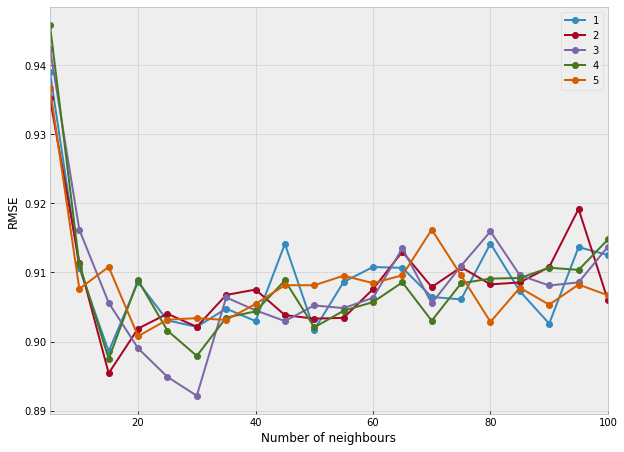

In [25]:
metric.plot(x="neighbours", y = ["1","2","3","4","5"], grid=True, figsize=(10,7.5),marker='o')
style.use('bmh')
pl.xlabel("Number of neighbours")
pl.ylabel("RMSE")
plt.legend(loc='upper right')

# Example

In [ ]:
fr = pd.DataFrame([[2,8],[4,5]])
rmse(fr[0],fr[1])

### Example: RMSE = sqrt( [(2-8)^2 + (4-5)^2]/2  ) = 4.301162633521313